# Statistiques descriptives

### Import des packages utilisés

les packages n'étaient pas installés
``` python
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
```

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
from jyquickhelper import add_notebook_menu

add_notebook_menu()

On utilise cartiflette pour visualiser l'ensemble des données sur une carte de France.
```python
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartogether
```


In [151]:
import cartiflette.s3

from cartiflette.download import get_vectorfile_ign

dep = get_vectorfile_ign(
  level = "DEPARTEMENT",
  source = "COG", provider="opendatarchives")
dep

http://files.opendatarchives.fr/professionnels.ign.fr/adminexpress/ADMIN-EXPRESS-COG_3-1__SHP__FRA_L93_2022-04-15.7z
Data have been previously downloaded and are still available in C:\Users\kilia\AppData\Local\Temp/COG-2022


ID              NOM_M                NOM INSEE_DEP  \
0   DEPARTEM_FXX_00000000001                AIN                Ain        01   
1   DEPARTEM_FXX_00000000002              AISNE              Aisne        02   
2   DEPARTEM_FXX_00000000003       CORSE-DU-SUD       Corse-du-Sud        2A   
3   DEPARTEM_FXX_00000000004        HAUTE-CORSE        Haute-Corse        2B   
4   DEPARTEM_FXX_00000000005             ALLIER             Allier        03   
..                       ...                ...                ...       ...   
91  DEPARTEM_FXX_00000000092            ESSONNE            Essonne        91   
92  DEPARTEM_FXX_00000000093     HAUTS-DE-SEINE     Hauts-de-Seine        92   
93  DEPARTEM_FXX_00000000094  SEINE-SAINT-DENIS  Seine-Saint-Denis        93   
94  DEPARTEM_FXX_00000000095       VAL-DE-MARNE       Val-de-Marne        94   
95  DEPARTEM_FXX_00000000096         VAL-D'OISE         Val-d'Oise        95   

   INSEE_REG                                           geometry  
0         84  POLYGON ((838383.200 6570485.800, 838483.800 6...  
1         32  POLYGON ((708719.000 6956305.000, 708718.700 6...  
2         94  MULTIPOLYGON (((1165315.300 6103089.200, 11653...  
3         94  MULTIPOLYGON (((1222168.900 6235253.100, 12221...  
4         84  POLYGON ((664478.800 6602292.500, 664503.600 6...  
..       ...                                                ...  
91        11  POLYGON ((629444.100 6836670.800, 629365.600 6...  
92        11  POLYGON ((642868.900 6869240.500, 642874.900 6...  
93        11  POLYGON ((660415.900 6872923.300, 660423.700 6...  
94        11  POLYGON ((650731.000 6857288.700, 650942.200 6...  
95        11  POLYGON ((658799.800 6892842.500, 658820.800 6...  

[96 rows x 6 columns]

In [152]:
dep.dtypes

ID             object
NOM_M          object
NOM            object
INSEE_DEP      object
INSEE_REG      object
geometry     geometry
dtype: object

In [153]:
france_dep = dep.dissolve()

Downloading: : 8.98MiB [00:00, 25.8MiB/s]
Downloading: : 11.3MiB [00:01, 9.44MiB/s]
Downloading: : 11.7MiB [00:01, 7.00MiB/s]
Downloading: : 10.8MiB [00:01, 7.24MiB/s]
Downloading: : 12.3MiB [00:00, 20.5MiB/s]
Downloading: : 8.14MiB [00:02, 3.71MiB/s]
Downloading: : 7.68MiB [00:00, 10.0MiB/s]
Downloading: : 8.16MiB [00:00, 11.1MiB/s]
Downloading: : 16.6MiB [00:01, 11.5MiB/s]
Downloading: : 8.60MiB [00:01, 6.85MiB/s]
Downloading: : 10.0MiB [00:02, 5.03MiB/s]
Downloading: : 8.73MiB [00:00, 12.7MiB/s]
Downloading: : 11.9MiB [00:00, 15.5MiB/s]
Downloading: : 18.9MiB [00:01, 11.7MiB/s]
Downloading: : 6.80MiB [00:00, 16.5MiB/s]
Downloading: : 14.3MiB [00:01, 11.3MiB/s]
Downloading: : 11.5MiB [00:00, 12.5MiB/s]
Downloading: : 11.9MiB [00:00, 15.7MiB/s]
Downloading: : 17.7MiB [00:01, 14.7MiB/s]
Downloading: : 7.81MiB [00:00, 17.5MiB/s]
Downloading: : 13.5MiB [00:01, 11.3MiB/s]
Downloading: : 17.2MiB [00:01, 17.1MiB/s]
Downloading: : 24.6MiB [00:02, 9.42MiB/s]
Downloading: : 11.1MiB [00:01, 10.

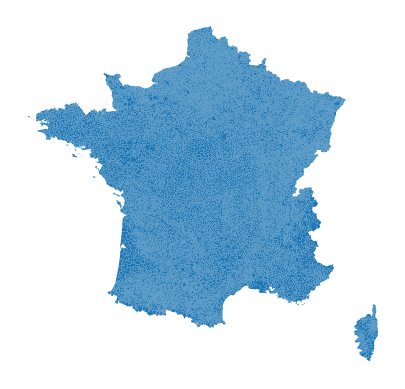

In [154]:
# Téléchargement un peu long
comm = cartiflette.s3.download_vectorfile_url_all(
    values = list(dep["INSEE_DEP"]),
    level="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)


ax = comm.plot()
ax.set_axis_off()

In [155]:
comm

ID                       NOM  \
0    COMMUNE_0000000009749108  Saint-Nizier-le-Bouchoux   
1    COMMUNE_0000000009749110                Lescheroux   
2    COMMUNE_0000000009751205                     Pizay   
3    COMMUNE_0000000009751466                Bressolles   
4    COMMUNE_0000002200276459        Valromey-sur-Séran   
..                        ...                       ...   
179  COMMUNE_0000000009733989         Beaumont-sur-Oise   
180  COMMUNE_0000000009734027                 Omerville   
181  COMMUNE_0000000009735023                  Margency   
182  COMMUNE_0000000009735013                Le Thillay   
183  COMMUNE_0000000009733496         Bruyères-sur-Oise   

                        NOM_M INSEE_COM          STATUT  POPULATION INSEE_CAN  \
0    SAINT-NIZIER-LE-BOUCHOUX     01380  Commune simple         632        17   
1                  LESCHEROUX     01212  Commune simple         718        17   
2                       PIZAY     01297  Commune simple         867        12   
3                  BRESSOLLES     01062  Commune simple         934        12   
4          VALROMEY-SUR-SERAN     01036  Commune simple        1326        10   
..                        ...       ...             ...         ...       ...   
179         BEAUMONT-SUR-OISE     95052  Commune simple        9504        14   
180                 OMERVILLE     95462  Commune simple         323        20   
181                  MARGENCY     95369  Commune simple        2846        15   
182                LE THILLAY     95612  Commune simple        4567        21   
183         BRUYERES-SUR-OISE     95116  Commune simple        4347        14   

    INSEE_ARR INSEE_DEP INSEE_REG SIREN_EPCI INSEE_ARM INSEE_COG  \
0           2        01        84  200071751      None     01380   
1           2        01        84  200071751      None     01212   
2           2        01        84  240100610      None     01297   
3           2        01        84  240100610      None     01062   
4           1        01        84  200040350      None     01036   
..        ...       ...       ...        ...       ...       ...   
179         3        95        11  249500489      None     95052   
180         3        95        11  249500513      None     95462   
181         2        95        11  200056380      None     95369   
182         2        95        11  200055655      None     95612   
183         3        95        11  249500489      None     95116   

                                              geometry  
0    POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1    POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2    POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3    POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4    POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
..                                                 ...  
179  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
180  POLYGON ((1.74171 49.13790, 1.74170 49.13777, ...  
181  POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...  
182  POLYGON ((2.44338 49.01131, 2.44344 49.01137, ...  
183  POLYGON ((2.35934 49.14733, 2.35882 49.14701, ...  

[34868 rows x 14 columns]

In [156]:
france_comm = comm.dissolve()

### Import des données

In [157]:
data = pd.read_csv(filepath_or_buffer='Données élections et INSEE.csv', encoding='l5', sep=',')

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\52252013.py:1: DtypeWarning: Columns (1,1911) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath_or_buffer='Données élections et INSEE.csv', encoding='l5', sep=',')


In [158]:
data

Unnamed: 0 CODGEO  P19_POP   P19_POP0014   P19_POP1529   P19_POP3044  \
0               0   1001    779.0    158.508629    102.468339    131.523972   
1               1   1002    256.0     58.646351     29.609476     74.028483   
2               2   1004  14134.0   2642.167045   3076.783602   2730.398468   
3               3   1005   1751.0    346.859147    268.250842    362.580808   
4               4   1006    112.0     12.218182     16.290909     15.272727   
...           ...    ...      ...           ...           ...           ...   
27595       27595  97420  24065.0   5706.444105   4877.987702   4640.069455   
27596       27596  97421   7136.0   1711.000000   1321.000000   1289.000000   
27597       27597  97422  79824.0  17965.710576  16081.862311  14636.246671   
27598       27598  97423   7015.0   1389.693054   1286.152394   1284.135423   
27599       27599  97424   5538.0   1193.058235    939.096111   1079.991550   

        P19_POP4559   P19_POP6074  P19_POP7589  P19_POP90P  ...  RTUH22  \
0        194.112147    131.050309    56.014471    5.322133  ...     0.0   
1         38.684019     35.381928    17.582020    2.067723  ...     0.0   
2       2391.347109   2054.139468  1044.007592  195.156716  ...    16.0   
3        380.267677    272.181257   111.034231    9.826038  ...     0.0   
4         29.527273     27.490909    10.181818    1.018182  ...     0.0   
...             ...           ...          ...         ...  ...     ...   
27595   5256.374356   2604.670639   902.029424   77.424318  ...     0.0   
27596   1575.000000    858.000000   354.000000   28.000000  ...     0.0   
27597  16582.101722  10535.209215  3678.636613  344.232891  ...     0.0   
27598   1708.032693    947.626169   349.944477   49.415791  ...     0.0   
27599   1304.195993    687.441525   306.950343   27.266243  ...     0.0   

       RTLIT22  AJCS22  AJCSUH22  AJCSLIT22  Code postal  \
0          0.0     0.0       0.0        0.0         1001   
1          0.0     0.0       0.0        0.0         1002   
2         16.0     0.0       0.0        0.0         1004   
3          0.0     0.0       0.0        0.0         1005   
4          0.0     0.0       0.0        0.0         1006   
...        ...     ...       ...        ...          ...   
27595      0.0     0.0       0.0        0.0        ZD420   
27596      0.0     0.0       0.0        0.0        ZD421   
27597      0.0     0.0       0.0        0.0        ZD422   
27598      0.0     0.0       0.0        0.0        ZD423   
27599      0.0     0.0       0.0        0.0        ZD424   

       Nom de l'Ã©lu en 2020  Nom de l'Ã©lu en 2014    LibellÃ© de la commune  \
0                     BOULON                 BOULON  L'Abergement-ClÃ©menciat   
1                      ORSET                  ORSET     L'Abergement-de-Varey   
2                      FABRE                  FABRE        AmbÃ©rieu-en-Bugey   
3                     PERNET                 PERNET      AmbÃ©rieux-en-Dombes   
4                     BIONDA                 BIONDA                  AmblÃ©on   
...                      ...                    ...                       ...   
27595               GIRONCEL               GIRONCEL            Sainte-Suzanne   
27596               FOUASSIN               FOUASSIN                   Salazie   
27597          THIEN AH KOON          THIEN AH KOON                 Le Tampon   
27598                  PAUSE                  PAUSE         Les Trois-Bassins   
27599                 TECHER                 TECHER                    Cilaos   

       Tentative de rÃ©Ã©lection  
0                           True  
1                           True  
2                           True  
3                           True  
4                           True  
...                          ...  
27595                       True  
27596                       True  
27597                       True  
27598                       True  
27599                       True  

[27600 rows x 1916 columns]

Création d'une colonne avec le numéro de département

In [159]:
data.dtypes

Unnamed: 0                     int64
CODGEO                        object
P19_POP                      float64
P19_POP0014                  float64
P19_POP1529                  float64
                              ...   
Code postal                   object
Nom de l'Ã©lu en 2020         object
Nom de l'Ã©lu en 2014         object
LibellÃ© de la commune        object
Tentative de rÃ©Ã©lection       bool
Length: 1916, dtype: object

On a besoin de convertir le dtype de la colonne CODGEO avant de procéder au slicing.

In [160]:
ds = data["CODGEO"].astype(str)
data["depart"] = ds.str.slice(stop=-3)
print(data["depart"])

0         1
1         1
2         1
3         1
4         1
         ..
27595    97
27596    97
27597    97
27598    97
27599    97
Name: depart, Length: 27600, dtype: object


On rajoute un '0' devant les départements n'ayant qu'un seul chiffre

In [161]:
for x in range (1,10):
    data["depart"][data["depart"]== str(x)] = '0' + str(x)
data["depart"]

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\3526128663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["depart"][data["depart"]== str(x)] = '0' + str(x)


0        01
1        01
2        01
3        01
4        01
         ..
27595    97
27596    97
27597    97
27598    97
27599    97
Name: depart, Length: 27600, dtype: object

On rajoute une colonne binaire qui vaut True si  la commune a plus de 1000 habitants et False sinon

In [162]:
data["1000_hab_19"] = np.where(data["P19_POP"] >= 1000, True, False)
data["1000_hab_13"] = np.where(data["P13_POP"] >= 1000, True, False)                      

On rajoute une colonne binaire qui vaut True si le maire de 2014 a été réélu en 2020 et False sinon

In [163]:
data["reelection"] = np.where(data["Nom de l'Ã©lu en 2020"] == data["Nom de l'Ã©lu en 2014"], True, False)

On rajoute un "0" devant les codes geo pour qu'ils correspondent avec ceux de la table cartiflette

In [164]:
data["INSEE_COG"] = ds
data["INSEE_COG"][data["INSEE_COG"].str.len() == 4] = "0" + data["INSEE_COG"]  
data["INSEE_COG"]                   

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\981108673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["INSEE_COG"][data["INSEE_COG"].str.len() == 4] = "0" + data["INSEE_COG"]


0        01001
1        01002
2        01004
3        01005
4        01006
         ...  
27595    97420
27596    97421
27597    97422
27598    97423
27599    97424
Name: INSEE_COG, Length: 27600, dtype: object

On retire les communes d'outre-mer (on en a assez peu)

In [165]:
data.drop(data[data['depart'] == "97" ].index, inplace = True)

### Données sur les maires

#### Communes de moins de 1000 habitants (en 2019)

In [166]:
data_1000 = data[["INSEE_COG","1000_hab_19"]]
data_1000["plus_1000_hab"] = np.where(data_1000["1000_hab_19"] , "Oui", "Non")
HAB_1000 = gpd.GeoDataFrame(data_1000.merge(comm, how= 'right', on = "INSEE_COG"))
HAB_1000

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\2611631140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1000["plus_1000_hab"] = np.where(data_1000["1000_hab_19"] , "Oui", "Non")


INSEE_COG 1000_hab_19 plus_1000_hab                        ID  \
0         01380       False           Non  COMMUNE_0000000009749108   
1         01212       False           Non  COMMUNE_0000000009749110   
2         01297       False           Non  COMMUNE_0000000009751205   
3         01062       False           Non  COMMUNE_0000000009751466   
4         01036         NaN           NaN  COMMUNE_0000002200276459   
...         ...         ...           ...                       ...   
34863     95052        True           Oui  COMMUNE_0000000009733989   
34864     95462       False           Non  COMMUNE_0000000009734027   
34865     95369        True           Oui  COMMUNE_0000000009735023   
34866     95612        True           Oui  COMMUNE_0000000009735013   
34867     95116        True           Oui  COMMUNE_0000000009733496   

                            NOM                     NOM_M INSEE_COM  \
0      Saint-Nizier-le-Bouchoux  SAINT-NIZIER-LE-BOUCHOUX     01380   
1                    Lescheroux                LESCHEROUX     01212   
2                         Pizay                     PIZAY     01297   
3                    Bressolles                BRESSOLLES     01062   
4            Valromey-sur-Séran        VALROMEY-SUR-SERAN     01036   
...                         ...                       ...       ...   
34863         Beaumont-sur-Oise         BEAUMONT-SUR-OISE     95052   
34864                 Omerville                 OMERVILLE     95462   
34865                  Margency                  MARGENCY     95369   
34866                Le Thillay                LE THILLAY     95612   
34867         Bruyères-sur-Oise         BRUYERES-SUR-OISE     95116   

               STATUT  POPULATION INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG  \
0      Commune simple         632        17         2        01        84   
1      Commune simple         718        17         2        01        84   
2      Commune simple         867        12         2        01        84   
3      Commune simple         934        12         2        01        84   
4      Commune simple        1326        10         1        01        84   
...               ...         ...       ...       ...       ...       ...   
34863  Commune simple        9504        14         3        95        11   
34864  Commune simple         323        20         3        95        11   
34865  Commune simple        2846        15         2        95        11   
34866  Commune simple        4567        21         2        95        11   
34867  Commune simple        4347        14         3        95        11   

      SIREN_EPCI INSEE_ARM                                           geometry  
0      200071751      None  POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      200071751      None  POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      240100610      None  POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      240100610      None  POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      200040350      None  POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...          ...       ...                                                ...  
34863  249500489      None  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
34864  249500513      None  POLYGON ((1.74171 49.13790, 1.74170 49.13777, ...  
34865  200056380      None  POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...  
34866  200055655      None  POLYGON ((2.44338 49.01131, 2.44344 49.01137, ...  
34867  249500489      None  POLYGON ((2.35934 49.14733, 2.35882 49.14701, ...  

[34868 rows x 16 columns]

Text(0.5, 1.0, 'La commune a plus de 1000 habitants en 2019')

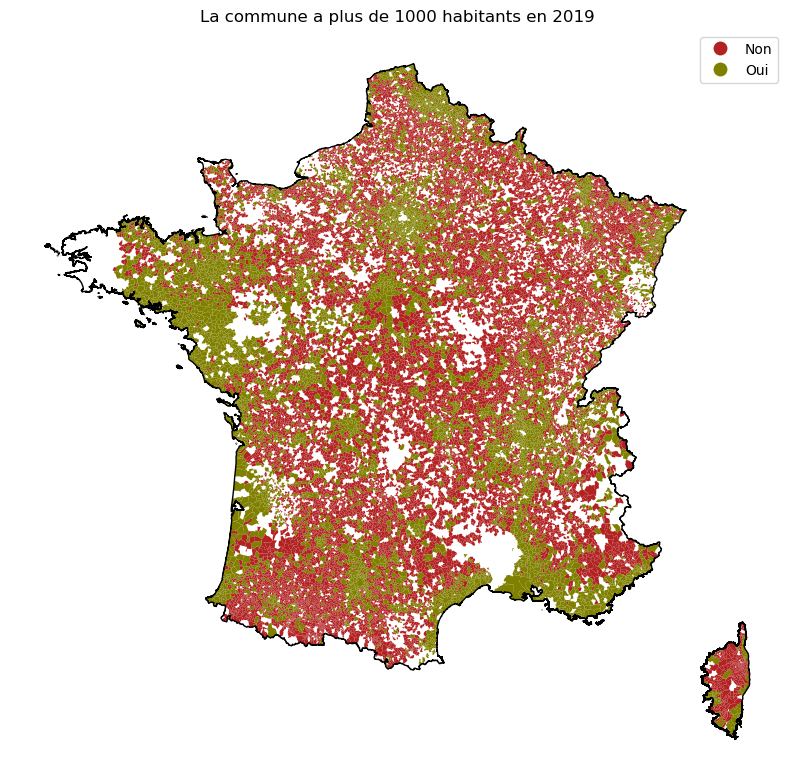

In [167]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'firebrick'), (1.0, 'olive')])
fig,ax = plt.subplots(figsize=(10, 10))
HAB_1000.plot(ax = ax ,column = "plus_1000_hab", legend = True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("La commune a plus de 1000 habitants en 2019")

Statistiques descriptives de la variable binaire "la commune a plus de 1000 habitants en 2019" :

In [168]:
data["1000_hab_19"].describe()

count     27505
unique        2
top       False
freq      19246
Name: 1000_hab_19, dtype: object

On a donc plus de communes avec moins de 1000 habitants

In [169]:
L = list(data["1000_hab_19"].describe())
print("Pourcentage de communes avec moins de 1000 habitants :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées :", L[0])
print("Nombre de communes avec moins de 1000 habitants :", L[3])

Pourcentage de communes avec moins de 1000 habitants : 69.97 %
Nombre de communes étudiées : 27505
Nombre de communes avec moins de 1000 habitants : 19246


#### Communes pour lesquelles les maires ont tenté d'être réélus

Tentative de réélection du maire pour toutes les communes étudiées.

In [170]:
data_tentatives = data[["INSEE_COG","Tentative de rÃ©Ã©lection","1000_hab_19","1000_hab_13"]]
data_tentatives["tentative_reelec"] = np.where(data_tentatives["Tentative de rÃ©Ã©lection"] , "Oui", "Non")
TENTATIVES = gpd.GeoDataFrame(data_tentatives.merge(comm, how= 'right', on = "INSEE_COG"))
TENTATIVES

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\2087997550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tentatives["tentative_reelec"] = np.where(data_tentatives["Tentative de rÃ©Ã©lection"] , "Oui", "Non")


INSEE_COG Tentative de rÃ©Ã©lection 1000_hab_19 1000_hab_13  \
0         01380                      True       False       False   
1         01212                      True       False       False   
2         01297                      True       False       False   
3         01062                     False       False       False   
4         01036                       NaN         NaN         NaN   
...         ...                       ...         ...         ...   
34863     95052                      True        True        True   
34864     95462                      True       False       False   
34865     95369                     False        True        True   
34866     95612                     False        True        True   
34867     95116                      True        True        True   

      tentative_reelec                        ID                       NOM  \
0                  Oui  COMMUNE_0000000009749108  Saint-Nizier-le-Bouchoux   
1                  Oui  COMMUNE_0000000009749110                Lescheroux   
2                  Oui  COMMUNE_0000000009751205                     Pizay   
3                  Non  COMMUNE_0000000009751466                Bressolles   
4                  NaN  COMMUNE_0000002200276459        Valromey-sur-Séran   
...                ...                       ...                       ...   
34863              Oui  COMMUNE_0000000009733989         Beaumont-sur-Oise   
34864              Oui  COMMUNE_0000000009734027                 Omerville   
34865              Non  COMMUNE_0000000009735023                  Margency   
34866              Non  COMMUNE_0000000009735013                Le Thillay   
34867              Oui  COMMUNE_0000000009733496         Bruyères-sur-Oise   

                          NOM_M INSEE_COM          STATUT  POPULATION  \
0      SAINT-NIZIER-LE-BOUCHOUX     01380  Commune simple         632   
1                    LESCHEROUX     01212  Commune simple         718   
2                         PIZAY     01297  Commune simple         867   
3                    BRESSOLLES     01062  Commune simple         934   
4            VALROMEY-SUR-SERAN     01036  Commune simple        1326   
...                         ...       ...             ...         ...   
34863         BEAUMONT-SUR-OISE     95052  Commune simple        9504   
34864                 OMERVILLE     95462  Commune simple         323   
34865                  MARGENCY     95369  Commune simple        2846   
34866                LE THILLAY     95612  Commune simple        4567   
34867         BRUYERES-SUR-OISE     95116  Commune simple        4347   

      INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG SIREN_EPCI INSEE_ARM  \
0            17         2        01        84  200071751      None   
1            17         2        01        84  200071751      None   
2            12         2        01        84  240100610      None   
3            12         2        01        84  240100610      None   
4            10         1        01        84  200040350      None   
...         ...       ...       ...       ...        ...       ...   
34863        14         3        95        11  249500489      None   
34864        20         3        95        11  249500513      None   
34865        15         2        95        11  200056380      None   
34866        21         2        95        11  200055655      None   
34867        14         3        95        11  249500489      None   

                                                geometry  
0      POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...                                                  ...  
34863  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
34864  POLYGON ((1.74171 49.13790, 1.74170 49.1377

Text(0.5, 1.0, "Le maire de la commune a tenté d'être réélu")

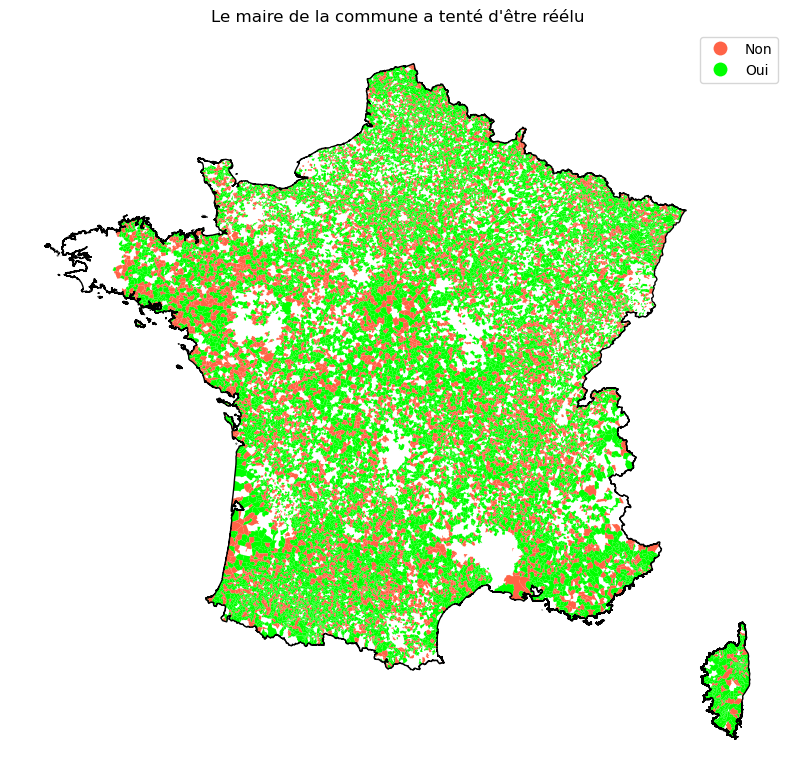

In [171]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'tomato'), (1.0, 'lime')])
fig,ax = plt.subplots(figsize=(10, 10))
TENTATIVES.plot(ax = ax ,column = "tentative_reelec", legend = True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Le maire de la commune a tenté d'être réélu")

Statistiques descriptives de la variable binaire "le maire a tenté une réélection" :

In [172]:
data["Tentative de rÃ©Ã©lection"].describe()

count     27505
unique        2
top        True
freq      18589
Name: Tentative de rÃ©Ã©lection, dtype: object

On a donc plus de maires qui ont tenté une réélection

In [173]:
L = list(data["Tentative de rÃ©Ã©lection"].describe())
print("Pourcentage de tentatives :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées :", L[0])
print("Nombre de tentatives :", L[3])

Pourcentage de tentatives : 67.58 %
Nombre de communes étudiées : 27505
Nombre de tentatives : 18589


Tentative de réélection du maire pour toutes les communes étudiées de plus de 1000 habitants (en 2019).

In [174]:
data_tentatives_min = data[["INSEE_COG","Tentative de rÃ©Ã©lection","1000_hab_19","1000_hab_13"]]
data_tentatives_min["tentative_reelec"] = np.where(data_tentatives_min["Tentative de rÃ©Ã©lection"] , "Oui", "Non")
data_tentatives_min.loc[ data_tentatives_min["1000_hab_19"] == False, "tentative_reelec"] = "Moins de 1000 habitants"
TENTATIVES = gpd.GeoDataFrame(data_tentatives_min.merge(comm, how= 'right', on = "INSEE_COG"))
TENTATIVES

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\3144979500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tentatives_min["tentative_reelec"] = np.where(data_tentatives_min["Tentative de rÃ©Ã©lection"] , "Oui", "Non")


INSEE_COG Tentative de rÃ©Ã©lection 1000_hab_19 1000_hab_13  \
0         01380                      True       False       False   
1         01212                      True       False       False   
2         01297                      True       False       False   
3         01062                     False       False       False   
4         01036                       NaN         NaN         NaN   
...         ...                       ...         ...         ...   
34863     95052                      True        True        True   
34864     95462                      True       False       False   
34865     95369                     False        True        True   
34866     95612                     False        True        True   
34867     95116                      True        True        True   

              tentative_reelec                        ID  \
0      Moins de 1000 habitants  COMMUNE_0000000009749108   
1      Moins de 1000 habitants  COMMUNE_0000000009749110   
2      Moins de 1000 habitants  COMMUNE_0000000009751205   
3      Moins de 1000 habitants  COMMUNE_0000000009751466   
4                          NaN  COMMUNE_0000002200276459   
...                        ...                       ...   
34863                      Oui  COMMUNE_0000000009733989   
34864  Moins de 1000 habitants  COMMUNE_0000000009734027   
34865                      Non  COMMUNE_0000000009735023   
34866                      Non  COMMUNE_0000000009735013   
34867                      Oui  COMMUNE_0000000009733496   

                            NOM                     NOM_M INSEE_COM  \
0      Saint-Nizier-le-Bouchoux  SAINT-NIZIER-LE-BOUCHOUX     01380   
1                    Lescheroux                LESCHEROUX     01212   
2                         Pizay                     PIZAY     01297   
3                    Bressolles                BRESSOLLES     01062   
4            Valromey-sur-Séran        VALROMEY-SUR-SERAN     01036   
...                         ...                       ...       ...   
34863         Beaumont-sur-Oise         BEAUMONT-SUR-OISE     95052   
34864                 Omerville                 OMERVILLE     95462   
34865                  Margency                  MARGENCY     95369   
34866                Le Thillay                LE THILLAY     95612   
34867         Bruyères-sur-Oise         BRUYERES-SUR-OISE     95116   

               STATUT  POPULATION INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG  \
0      Commune simple         632        17         2        01        84   
1      Commune simple         718        17         2        01        84   
2      Commune simple         867        12         2        01        84   
3      Commune simple         934        12         2        01        84   
4      Commune simple        1326        10         1        01        84   
...               ...         ...       ...       ...       ...       ...   
34863  Commune simple        9504        14         3        95        11   
34864  Commune simple         323        20         3        95        11   
34865  Commune simple        2846        15         2        95        11   
34866  Commune simple        4567        21         2        95        11   
34867  Commune simple        4347        14         3        95        11   

      SIREN_EPCI INSEE_ARM                                           geometry  
0      200071751      None  POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      200071751      None  POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      240100610      None  POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      240100610      None  POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      200040350      None  POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...          ...       ...                                                ...  
34863  249500489      None  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
34864  249500513      None  POLYGON ((

Text(0.5, 1.0, "Le maire de la commune (plus de 1000 habitants) a tenté d'être réélu")

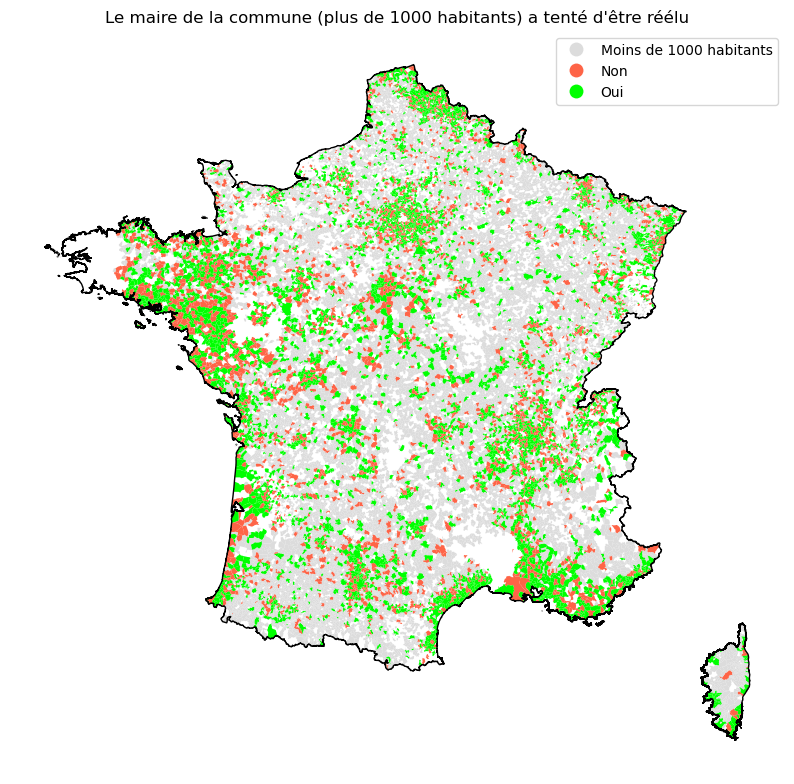

In [175]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'gainsboro'), (0.5, 'tomato'), (1.0, 'lime'), ])
fig,ax = plt.subplots(figsize=(10, 10))
TENTATIVES.plot(ax = ax ,column = "tentative_reelec", legend = True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Le maire de la commune (plus de 1000 habitants) a tenté d'être réélu")

Statistiques descriptives de la variable binaire "le maire a tenté une réélection (commune de plus de 1000 habitants)" :

In [176]:
data["Tentative de rÃ©Ã©lection"][data["1000_hab_19"]].describe()

count     8259
unique       2
top       True
freq      4924
Name: Tentative de rÃ©Ã©lection, dtype: object

On a donc plus de maires qui ont tenté la réélection

In [177]:
L = list(data["Tentative de rÃ©Ã©lection"][data["1000_hab_19"]].describe())
print("Pourcentage de tentatives :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées de plus de 1000 habitants:", L[0])
print("Nombre de tentatives :", L[3])

Pourcentage de tentatives : 59.62 %
Nombre de communes étudiées de plus de 1000 habitants: 8259
Nombre de tentatives : 4924


Tentative de réélection du maire pour toutes les communes étudiées de plus de 1000 habitants (en 2019).

In [178]:
data_tentatives_max = data[["INSEE_COG","Tentative de rÃ©Ã©lection","1000_hab_19","1000_hab_13"]]
data_tentatives_max["tentative_reelec"] = np.where(data_tentatives_max["Tentative de rÃ©Ã©lection"] , "Oui", "Non")
data_tentatives_max.loc[ data_tentatives_max["1000_hab_19"], "tentative_reelec"] = "Plus de 1000 habitants"
TENTATIVES = gpd.GeoDataFrame(data_tentatives_max.merge(comm, how= 'right', on = "INSEE_COG"))
TENTATIVES

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\4005579385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tentatives_max["tentative_reelec"] = np.where(data_tentatives_max["Tentative de rÃ©Ã©lection"] , "Oui", "Non")


INSEE_COG Tentative de rÃ©Ã©lection 1000_hab_19 1000_hab_13  \
0         01380                      True       False       False   
1         01212                      True       False       False   
2         01297                      True       False       False   
3         01062                     False       False       False   
4         01036                       NaN         NaN         NaN   
...         ...                       ...         ...         ...   
34863     95052                      True        True        True   
34864     95462                      True       False       False   
34865     95369                     False        True        True   
34866     95612                     False        True        True   
34867     95116                      True        True        True   

             tentative_reelec                        ID  \
0                         Oui  COMMUNE_0000000009749108   
1                         Oui  COMMUNE_0000000009749110   
2                         Oui  COMMUNE_0000000009751205   
3                         Non  COMMUNE_0000000009751466   
4                         NaN  COMMUNE_0000002200276459   
...                       ...                       ...   
34863  Plus de 1000 habitants  COMMUNE_0000000009733989   
34864                     Oui  COMMUNE_0000000009734027   
34865  Plus de 1000 habitants  COMMUNE_0000000009735023   
34866  Plus de 1000 habitants  COMMUNE_0000000009735013   
34867  Plus de 1000 habitants  COMMUNE_0000000009733496   

                            NOM                     NOM_M INSEE_COM  \
0      Saint-Nizier-le-Bouchoux  SAINT-NIZIER-LE-BOUCHOUX     01380   
1                    Lescheroux                LESCHEROUX     01212   
2                         Pizay                     PIZAY     01297   
3                    Bressolles                BRESSOLLES     01062   
4            Valromey-sur-Séran        VALROMEY-SUR-SERAN     01036   
...                         ...                       ...       ...   
34863         Beaumont-sur-Oise         BEAUMONT-SUR-OISE     95052   
34864                 Omerville                 OMERVILLE     95462   
34865                  Margency                  MARGENCY     95369   
34866                Le Thillay                LE THILLAY     95612   
34867         Bruyères-sur-Oise         BRUYERES-SUR-OISE     95116   

               STATUT  POPULATION INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG  \
0      Commune simple         632        17         2        01        84   
1      Commune simple         718        17         2        01        84   
2      Commune simple         867        12         2        01        84   
3      Commune simple         934        12         2        01        84   
4      Commune simple        1326        10         1        01        84   
...               ...         ...       ...       ...       ...       ...   
34863  Commune simple        9504        14         3        95        11   
34864  Commune simple         323        20         3        95        11   
34865  Commune simple        2846        15         2        95        11   
34866  Commune simple        4567        21         2        95        11   
34867  Commune simple        4347        14         3        95        11   

      SIREN_EPCI INSEE_ARM                                           geometry  
0      200071751      None  POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      200071751      None  POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      240100610      None  POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      240100610      None  POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      200040350      None  POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...          ...       ...                                                ...  
34863  249500489      None  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
34864  249500513      None  POLYGON ((1.74171 49.1

Text(0.5, 1.0, "Le maire de la commune (moins de 1000 habitants) a tenté d'être réélu")

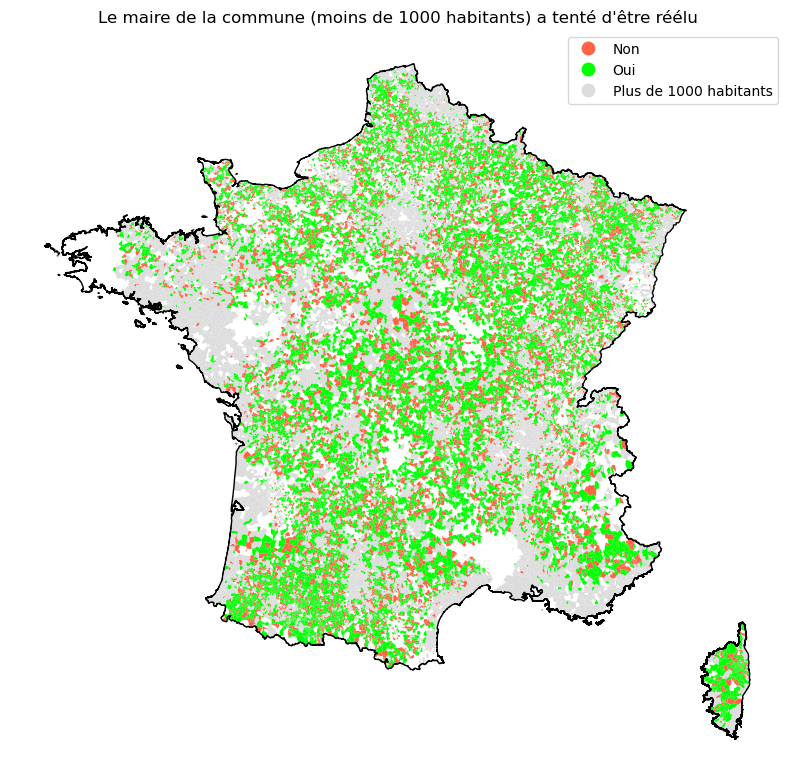

In [179]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'tomato'), (0.5, 'lime'), (1.0, 'gainsboro'), ])
fig,ax = plt.subplots(figsize=(10, 10))
TENTATIVES.plot(ax = ax ,column = "tentative_reelec", legend = True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Le maire de la commune (moins de 1000 habitants) a tenté d'être réélu")

Statistiques descriptives de la variable binaire "le maire a tenté une réélection (commune de moins de 1000 habitants)" :

In [180]:
data["Tentative de rÃ©Ã©lection"][data["1000_hab_19"]== False].describe()

count     19246
unique        2
top        True
freq      13665
Name: Tentative de rÃ©Ã©lection, dtype: object

On a donc plus de maires qui ont tenté la réélection

In [181]:
L = list(data["Tentative de rÃ©Ã©lection"][data["1000_hab_19"]== False].describe())
print("Pourcentage de tentatives :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées de moins de 1000 habitants:", L[0])
print("Nombre de tentatives :", L[3])

Pourcentage de tentatives : 71.0 %
Nombre de communes étudiées de moins de 1000 habitants: 19246
Nombre de tentatives : 13665


#### Communes pour lesquelles les maires ont été réélus

Réélection du maire pour toutes les communes étudiées

In [182]:
data_reelection = data[["INSEE_COG","reelection","1000_hab_19","1000_hab_13"]]
data_reelection["reelection_str"] = np.where(data_reelection["reelection"], "Oui", "Non")
REELECTION = gpd.GeoDataFrame(data_reelection.merge(comm, how = 'right', on = "INSEE_COG"))
REELECTION

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\3921138320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reelection["reelection_str"] = np.where(data_reelection["reelection"], "Oui", "Non")


INSEE_COG reelection 1000_hab_19 1000_hab_13 reelection_str  \
0         01380       True       False       False            Oui   
1         01212       True       False       False            Oui   
2         01297       True       False       False            Oui   
3         01062      False       False       False            Non   
4         01036        NaN         NaN         NaN            NaN   
...         ...        ...         ...         ...            ...   
34863     95052      False        True        True            Non   
34864     95462       True       False       False            Oui   
34865     95369      False        True        True            Non   
34866     95612      False        True        True            Non   
34867     95116       True        True        True            Oui   

                             ID                       NOM  \
0      COMMUNE_0000000009749108  Saint-Nizier-le-Bouchoux   
1      COMMUNE_0000000009749110                Lescheroux   
2      COMMUNE_0000000009751205                     Pizay   
3      COMMUNE_0000000009751466                Bressolles   
4      COMMUNE_0000002200276459        Valromey-sur-Séran   
...                         ...                       ...   
34863  COMMUNE_0000000009733989         Beaumont-sur-Oise   
34864  COMMUNE_0000000009734027                 Omerville   
34865  COMMUNE_0000000009735023                  Margency   
34866  COMMUNE_0000000009735013                Le Thillay   
34867  COMMUNE_0000000009733496         Bruyères-sur-Oise   

                          NOM_M INSEE_COM          STATUT  POPULATION  \
0      SAINT-NIZIER-LE-BOUCHOUX     01380  Commune simple         632   
1                    LESCHEROUX     01212  Commune simple         718   
2                         PIZAY     01297  Commune simple         867   
3                    BRESSOLLES     01062  Commune simple         934   
4            VALROMEY-SUR-SERAN     01036  Commune simple        1326   
...                         ...       ...             ...         ...   
34863         BEAUMONT-SUR-OISE     95052  Commune simple        9504   
34864                 OMERVILLE     95462  Commune simple         323   
34865                  MARGENCY     95369  Commune simple        2846   
34866                LE THILLAY     95612  Commune simple        4567   
34867         BRUYERES-SUR-OISE     95116  Commune simple        4347   

      INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG SIREN_EPCI INSEE_ARM  \
0            17         2        01        84  200071751      None   
1            17         2        01        84  200071751      None   
2            12         2        01        84  240100610      None   
3            12         2        01        84  240100610      None   
4            10         1        01        84  200040350      None   
...         ...       ...       ...       ...        ...       ...   
34863        14         3        95        11  249500489      None   
34864        20         3        95        11  249500513      None   
34865        15         2        95        11  200056380      None   
34866        21         2        95        11  200055655      None   
34867        14         3        95        11  249500489      None   

                                                geometry  
0      POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...                                                  ...  
34863  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
34864  POLYGON ((1.74171 49.13790, 1.74170 49.13777, ...  
34865  POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...  
34866  POLYGON ((2.44338 49.01131, 2.44344 49.01137, ...  
34867  POLYGON ((2.35934 49.14733, 2.35882 49.14701, ...  

[34868 rows x 18 

Text(0.5, 1.0, 'Le maire de la commune a été réélu')

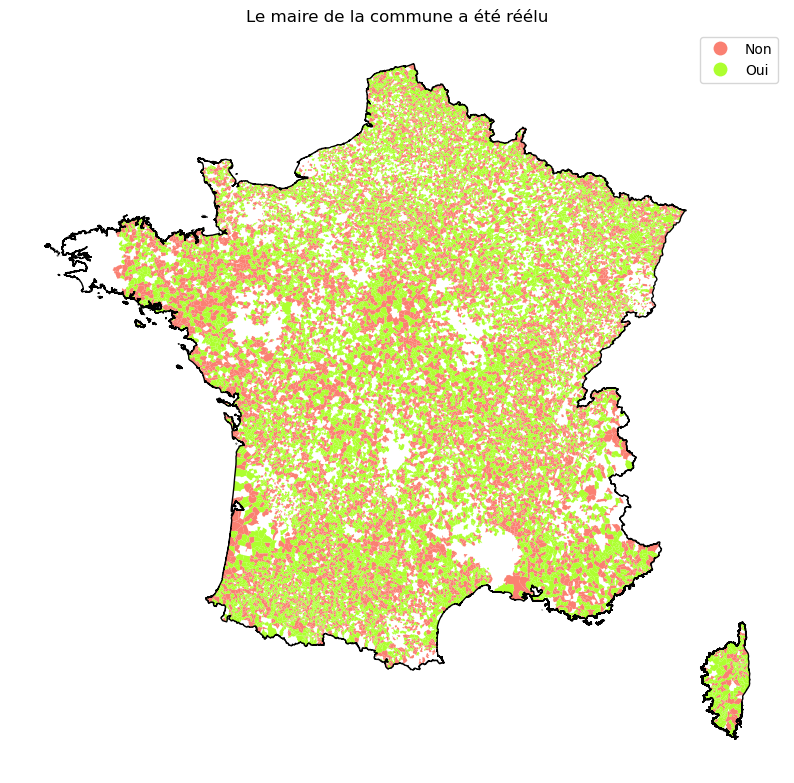

In [183]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'salmon'), (1.0, 'greenyellow')])
fig,ax = plt.subplots(figsize=(10, 10))
REELECTION.plot(ax =ax, column = "reelection_str", legend =True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Le maire de la commune a été réélu")

Statistiques descriptives de la variable binaire "le maire a été réélu" :

In [184]:
data["reelection"].describe()

count     27505
unique        2
top        True
freq      15771
Name: reelection, dtype: object

On a plus de maires qui ont été réélus

In [185]:
L = list(data["reelection"].describe())
print("Pourcentage de réélections :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées :", L[0])
print("Nombre de réélections :", L[3])

Pourcentage de réélections : 57.34 %
Nombre de communes étudiées : 27505
Nombre de réélections : 15771


Réélection des maires pour les communes étudiées de plus de 1000 habitants en 2019.

In [186]:
data_reelection_min = data[["INSEE_COG","reelection","1000_hab_19","1000_hab_13"]]
data_reelection_min["reelection_str"] = np.where(data_reelection_min["reelection"], "Oui", "Non")
data_reelection_min.loc[data_reelection_min["1000_hab_19"] == False, "reelection_str"] = "Moins de 1000 habitants"
REELECTION = gpd.GeoDataFrame(data_reelection_min.merge(comm, how ='right', on = "INSEE_COG"))
REELECTION

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\4210539253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reelection_min["reelection_str"] = np.where(data_reelection_min["reelection"], "Oui", "Non")


INSEE_COG reelection 1000_hab_19 1000_hab_13           reelection_str  \
0         01380       True       False       False  Moins de 1000 habitants   
1         01212       True       False       False  Moins de 1000 habitants   
2         01297       True       False       False  Moins de 1000 habitants   
3         01062      False       False       False  Moins de 1000 habitants   
4         01036        NaN         NaN         NaN                      NaN   
...         ...        ...         ...         ...                      ...   
34863     95052      False        True        True                      Non   
34864     95462       True       False       False  Moins de 1000 habitants   
34865     95369      False        True        True                      Non   
34866     95612      False        True        True                      Non   
34867     95116       True        True        True                      Oui   

                             ID                       NOM  \
0      COMMUNE_0000000009749108  Saint-Nizier-le-Bouchoux   
1      COMMUNE_0000000009749110                Lescheroux   
2      COMMUNE_0000000009751205                     Pizay   
3      COMMUNE_0000000009751466                Bressolles   
4      COMMUNE_0000002200276459        Valromey-sur-Séran   
...                         ...                       ...   
34863  COMMUNE_0000000009733989         Beaumont-sur-Oise   
34864  COMMUNE_0000000009734027                 Omerville   
34865  COMMUNE_0000000009735023                  Margency   
34866  COMMUNE_0000000009735013                Le Thillay   
34867  COMMUNE_0000000009733496         Bruyères-sur-Oise   

                          NOM_M INSEE_COM          STATUT  POPULATION  \
0      SAINT-NIZIER-LE-BOUCHOUX     01380  Commune simple         632   
1                    LESCHEROUX     01212  Commune simple         718   
2                         PIZAY     01297  Commune simple         867   
3                    BRESSOLLES     01062  Commune simple         934   
4            VALROMEY-SUR-SERAN     01036  Commune simple        1326   
...                         ...       ...             ...         ...   
34863         BEAUMONT-SUR-OISE     95052  Commune simple        9504   
34864                 OMERVILLE     95462  Commune simple         323   
34865                  MARGENCY     95369  Commune simple        2846   
34866                LE THILLAY     95612  Commune simple        4567   
34867         BRUYERES-SUR-OISE     95116  Commune simple        4347   

      INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG SIREN_EPCI INSEE_ARM  \
0            17         2        01        84  200071751      None   
1            17         2        01        84  200071751      None   
2            12         2        01        84  240100610      None   
3            12         2        01        84  240100610      None   
4            10         1        01        84  200040350      None   
...         ...       ...       ...       ...        ...       ...   
34863        14         3        95        11  249500489      None   
34864        20         3        95        11  249500513      None   
34865        15         2        95        11  200056380      None   
34866        21         2        95        11  200055655      None   
34867        14         3        95        11  249500489      None   

                                                geometry  
0      POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...                                                  ...  
34863  POLYGON ((2.32006 49.12486, 2.31987 49.12481, ...  
34864  POLYGON ((1.74171 49.13790, 1.74170 49.13777, ...  
34865  POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...  
34866  POLYGON (

Text(0.5, 1.0, 'Le maire de la commune a été réélu (communes de plus de 1000 habitants)')

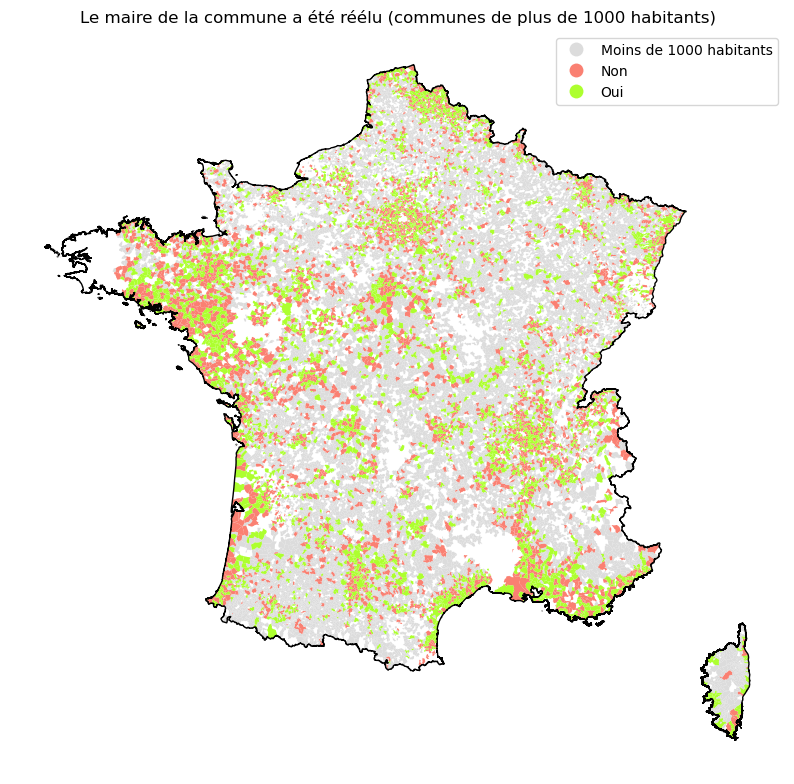

In [187]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'gainsboro'),(0.5, 'salmon'), (1.0, 'greenyellow')])
fig,ax = plt.subplots(figsize=(10, 10))
REELECTION.plot(ax =ax, column = "reelection_str", legend =True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Le maire de la commune a été réélu (communes de plus de 1000 habitants)")

Statistiques descriptives de la variable binaire "le maire a été réélu en 2020 (communes de plus de 1000 habitants)" :

In [188]:
data["reelection"][data["1000_hab_19"]].describe()

count     8259
unique       2
top       True
freq      4219
Name: reelection, dtype: object

On a donc plus de maires qui ont été réélus

In [189]:
L = list(data["reelection"][data["1000_hab_19"]].describe())
print("Pourcentage de réélections :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées de plus de 1000 habitants:", L[0])
print("Nombre de réélections :", L[3])

Pourcentage de réélections : 51.08 %
Nombre de communes étudiées de plus de 1000 habitants: 8259
Nombre de réélections : 4219


Réélection des maires pour les communes étudiées de moins de 1000 habitants en 2019.

In [190]:
data_reelection_max = data[["INSEE_COG","reelection","1000_hab_19","1000_hab_13"]]
data_reelection_max["reelection_str"] = np.where(data_reelection_max["reelection"], "Oui", "Non")
data_reelection_max.loc[data_reelection_max["1000_hab_19"],"reelection_str"] = "Plus de 1000 habitants"
REELECTION = gpd.GeoDataFrame(data_reelection_max.merge(comm, how ='right', on = "INSEE_COG"))

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\451895703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reelection_max["reelection_str"] = np.where(data_reelection_max["reelection"], "Oui", "Non")


Text(0.5, 1.0, 'Le maire de la commune a été réélu (communes de moins de 1000 habitants)')

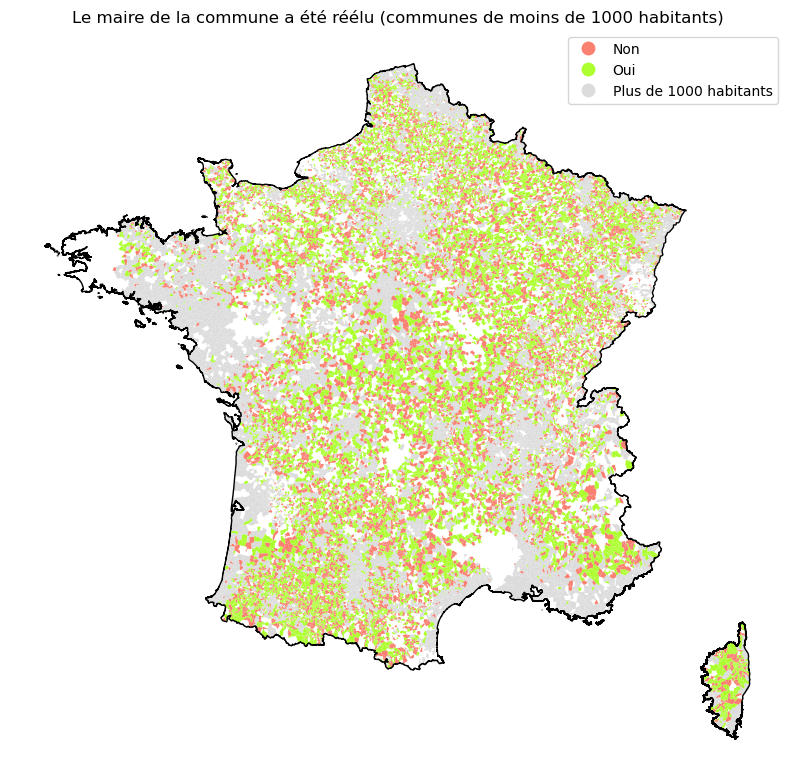

In [191]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'salmon'), (0.5, 'greenyellow'),(1.0, 'gainsboro')])
fig,ax = plt.subplots(figsize=(10, 10))
REELECTION.plot(ax =ax, column = "reelection_str", legend =True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Le maire de la commune a été réélu (communes de moins de 1000 habitants)")

Statistiques descriptives de la variable binaire "le maire a été réélu en 2020 (communes de moins de 1000 habitants)" :

In [192]:
data["reelection"][data["1000_hab_19"]==False].describe()

count     19246
unique        2
top        True
freq      11552
Name: reelection, dtype: object

On a donc plus de maires qui ont été réélus

In [193]:
L = list(data["reelection"][data["1000_hab_19"]].describe())
print("Pourcentage de réélections :", round((L[3]/L[0]*100),2), "%")
print("Nombre de communes étudiées de moins de 1000 habitants:", L[0])
print("Nombre de réélections :", L[3])

Pourcentage de réélections : 51.08 %
Nombre de communes étudiées de moins de 1000 habitants: 8259
Nombre de réélections : 4219


#### Réélection des maires ayant tenté d'être réélus

Réélection des maires ayant tenté d'être réélus pour tous les communes étudiées

In [194]:
data_reelec_tent = data[["INSEE_COG","Tentative de rÃ©Ã©lection","reelection","1000_hab_19","1000_hab_13"]]
data_reelec_tent["reelec_tent"] = np.where((data_reelec_tent["reelection"])&(data_reelec_tent["reelection"]) , "Oui", "Non")
data_reelec_tent.loc[data_reelec_tent["Tentative de rÃ©Ã©lection"] == False,"reelec_tent"] = "Pas de tentative"
REELEC_TENT = gpd.GeoDataFrame(data_reelec_tent.merge(comm, how= 'right', on = "INSEE_COG"))
REELEC_TENT

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\2909740947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reelec_tent["reelec_tent"] = np.where((data_reelec_tent["reelection"])&(data_reelec_tent["reelection"]) , "Oui", "Non")


INSEE_COG Tentative de rÃ©Ã©lection reelection 1000_hab_19 1000_hab_13  \
0         01380                      True       True       False       False   
1         01212                      True       True       False       False   
2         01297                      True       True       False       False   
3         01062                     False      False       False       False   
4         01036                       NaN        NaN         NaN         NaN   
...         ...                       ...        ...         ...         ...   
34863     95052                      True      False        True        True   
34864     95462                      True       True       False       False   
34865     95369                     False      False        True        True   
34866     95612                     False      False        True        True   
34867     95116                      True       True        True        True   

            reelec_tent                        ID                       NOM  \
0                   Oui  COMMUNE_0000000009749108  Saint-Nizier-le-Bouchoux   
1                   Oui  COMMUNE_0000000009749110                Lescheroux   
2                   Oui  COMMUNE_0000000009751205                     Pizay   
3      Pas de tentative  COMMUNE_0000000009751466                Bressolles   
4                   NaN  COMMUNE_0000002200276459        Valromey-sur-Séran   
...                 ...                       ...                       ...   
34863               Non  COMMUNE_0000000009733989         Beaumont-sur-Oise   
34864               Oui  COMMUNE_0000000009734027                 Omerville   
34865  Pas de tentative  COMMUNE_0000000009735023                  Margency   
34866  Pas de tentative  COMMUNE_0000000009735013                Le Thillay   
34867               Oui  COMMUNE_0000000009733496         Bruyères-sur-Oise   

                          NOM_M INSEE_COM          STATUT  POPULATION  \
0      SAINT-NIZIER-LE-BOUCHOUX     01380  Commune simple         632   
1                    LESCHEROUX     01212  Commune simple         718   
2                         PIZAY     01297  Commune simple         867   
3                    BRESSOLLES     01062  Commune simple         934   
4            VALROMEY-SUR-SERAN     01036  Commune simple        1326   
...                         ...       ...             ...         ...   
34863         BEAUMONT-SUR-OISE     95052  Commune simple        9504   
34864                 OMERVILLE     95462  Commune simple         323   
34865                  MARGENCY     95369  Commune simple        2846   
34866                LE THILLAY     95612  Commune simple        4567   
34867         BRUYERES-SUR-OISE     95116  Commune simple        4347   

      INSEE_CAN INSEE_ARR INSEE_DEP INSEE_REG SIREN_EPCI INSEE_ARM  \
0            17         2        01        84  200071751      None   
1            17         2        01        84  200071751      None   
2            12         2        01        84  240100610      None   
3            12         2        01        84  240100610      None   
4            10         1        01        84  200040350      None   
...         ...       ...       ...       ...        ...       ...   
34863        14         3        95        11  249500489      None   
34864        20         3        95        11  249500513      None   
34865        15         2        95        11  200056380      None   
34866        21         2        95        11  200055655      None   
34867        14         3        95        11  249500489      None   

                                                geometry  
0      POLYGON ((5.13119 46.43241, 5.12969 46.43359, ...  
1      POLYGON ((5.18675 46.41449, 5.18664 46.41448, ...  
2      POLYGON ((5.11034 45.88992, 5.11028 45.88991, ...  
3      POLYGON ((5.07969 45.86298, 5.07974 45.86300, ...  
4      POLYGON ((5.66760 45.91133, 5.66727 45.91112, ...  
...                     

Text(0.5, 1.0, "Réélection des maires s'étant présentés")

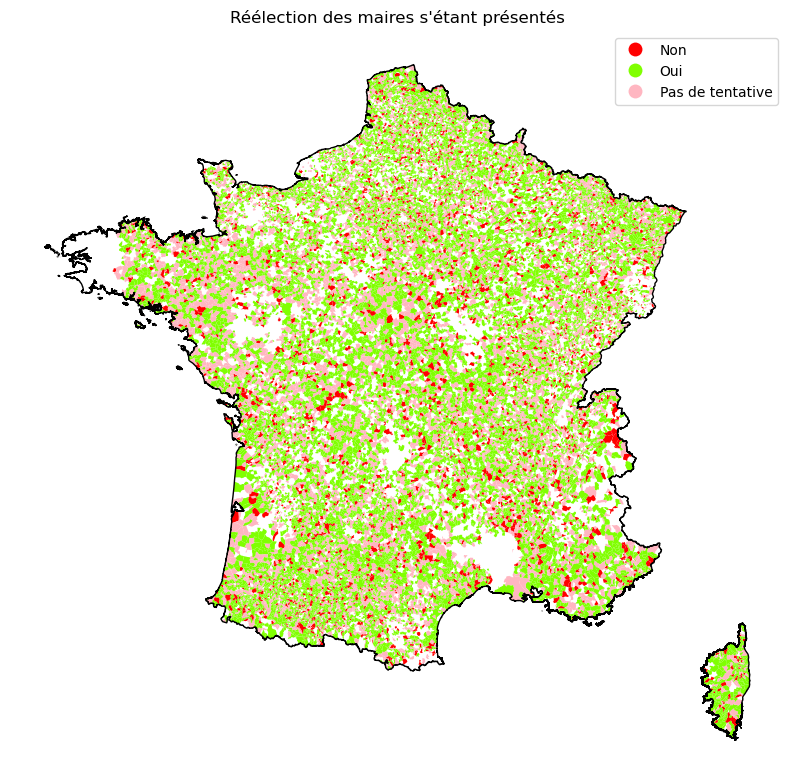

In [195]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'r'), (0.5, 'chartreuse'),(1.0, 'lightpink')])
fig,ax = plt.subplots(figsize=(10, 10))
REELEC_TENT.plot(ax =ax, column = "reelec_tent", legend =True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Réélection des maires s'étant présentés")

La majorité des maires ayant tenté d'être réélus ont réussi.

Statistiques croisées pour les variables "tentative de réélection" et "réélection" :

In [196]:
M = pd.DataFrame(pd.crosstab(data["Tentative de rÃ©Ã©lection"],data["reelection"]))
M

reelection                 False   True
Tentative de rÃ©Ã©lection              
False                       8916      0
True                        2818  15771

In [197]:
print("Pourcentage de maires ayant réussi à être réélus :", round(M[1][1]/(M[0][1]+M[1][1])*100,2),"%")

Pourcentage de maires ayant réussi à être réélus : 84.84 %


Pour les communes de plus de 1000 habitants

In [198]:
data_reelec_tent = data[["INSEE_COG","Tentative de rÃ©Ã©lection","reelection","1000_hab_19","1000_hab_13"]]
data_reelec_tent["reelec_tent"] = np.where((data_reelec_tent["reelection"])&(data_reelec_tent["reelection"]) , "Oui", "Non")
data_reelec_tent.loc[data_reelec_tent["Tentative de rÃ©Ã©lection"] == False,"reelec_tent"] = "Pas de tentative"
data_reelec_tent.loc[data_reelec_tent["1000_hab_19"] == False, "reelec_tent"] = "Moins de 1000 habitants"
REELEC_TENT = gpd.GeoDataFrame(data_reelec_tent.merge(comm, how= 'right', on = "INSEE_COG"))

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\3639795150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reelec_tent["reelec_tent"] = np.where((data_reelec_tent["reelection"])&(data_reelec_tent["reelection"]) , "Oui", "Non")


Text(0.5, 1.0, "Réélection des maires s'étant présentés pour les communes de plus de 1000 habitants")

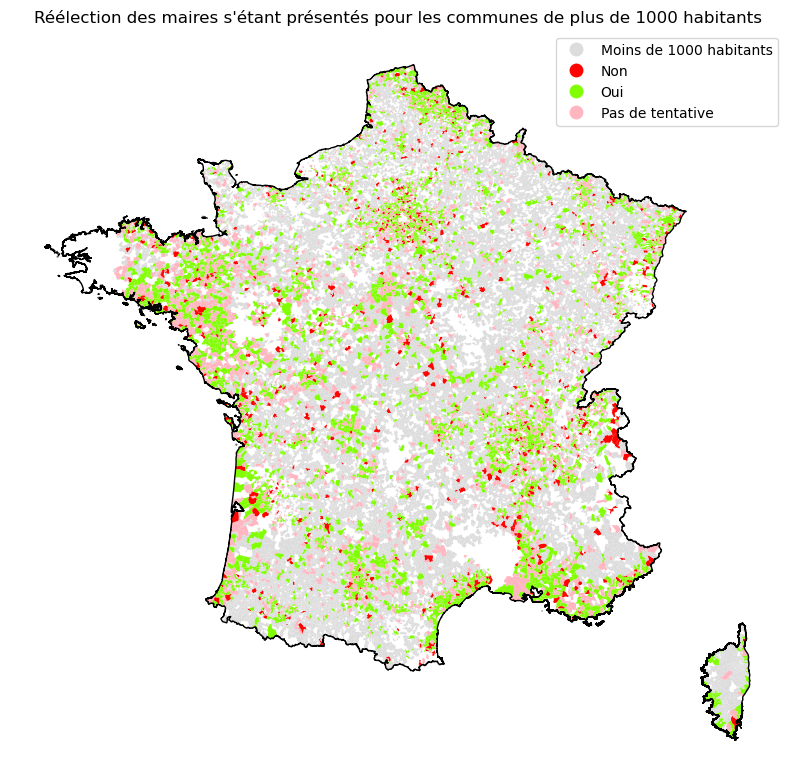

In [199]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'gainsboro'),(0.33, 'r'), (0.66, 'chartreuse'),(1.0, 'lightpink')])
fig,ax = plt.subplots(figsize=(10, 10))
REELEC_TENT.plot(ax =ax, column = "reelec_tent", legend =True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Réélection des maires s'étant présentés pour les communes de plus de 1000 habitants")

Statistiques croisées pour les variables "tentative de réélection" et "réélection" pour les communes de plus de 1000 habitants :

In [200]:
M = pd.DataFrame(pd.crosstab(data["Tentative de rÃ©Ã©lection"][data["1000_hab_19"]],data["reelection"][data["1000_hab_19"]]))
M

reelection                 False  True
Tentative de rÃ©Ã©lection             
False                       3335     0
True                         705  4219

In [201]:
print("Pourcentage de maires ayant réussi à être réélus pour les communes de plus de 1000 habitants:", round(M[1][1]/(M[0][1]+M[1][1])*100,2),"%")

Pourcentage de maires ayant réussi à être réélus pour les communes de plus de 1000 habitants: 85.68 %


Pour les communes de moins de 1000 habitants

In [202]:
data_reelec_tent = data[["INSEE_COG","Tentative de rÃ©Ã©lection","reelection","1000_hab_19","1000_hab_13"]]
data_reelec_tent["reelec_tent"] = np.where((data_reelec_tent["reelection"])&(data_reelec_tent["reelection"]) , "Oui", "Non")
data_reelec_tent.loc[data_reelec_tent["Tentative de rÃ©Ã©lection"] == False,"reelec_tent"] = "Pas de tentative"
data_reelec_tent.loc[data_reelec_tent["1000_hab_19"], "reelec_tent"] = "Plus de 1000 habitants"
REELEC_TENT = gpd.GeoDataFrame(data_reelec_tent.merge(comm, how= 'right', on = "INSEE_COG"))

C:\Users\kilia\AppData\Local\Temp\ipykernel_8340\3048558601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reelec_tent["reelec_tent"] = np.where((data_reelec_tent["reelection"])&(data_reelec_tent["reelection"]) , "Oui", "Non")


Text(0.5, 1.0, "Réélection des maires s'étant présentés pour les communes de moins de 1000 habitants")

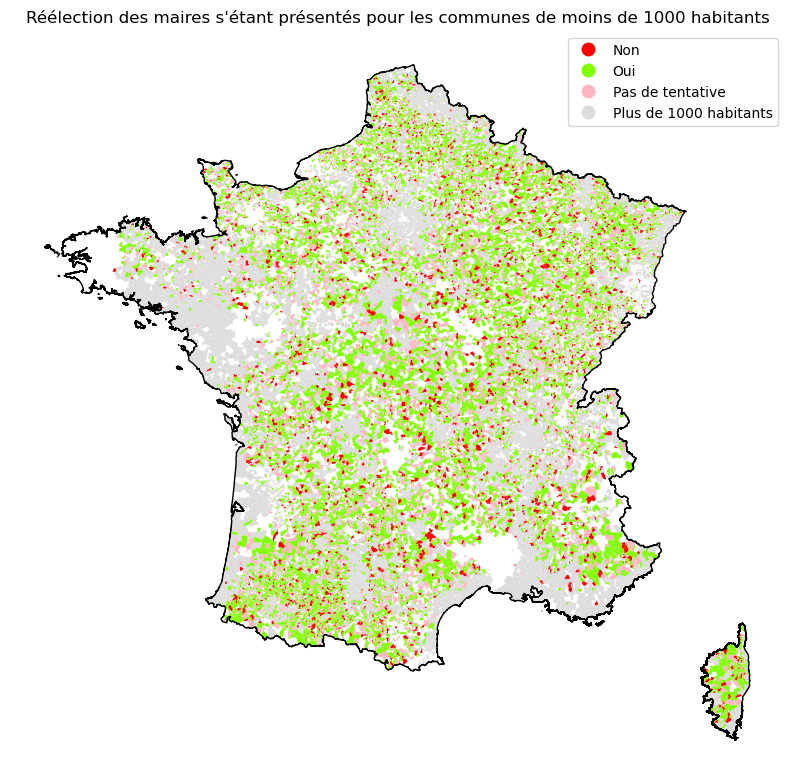

In [203]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'r'),(0.33, 'chartreuse'), (0.66, 'lightpink'),(1.0, 'gainsboro')])
fig,ax = plt.subplots(figsize=(10, 10))
REELEC_TENT.plot(ax =ax, column = "reelec_tent", legend =True, cmap=cmap)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()
plt.title("Réélection des maires s'étant présentés pour les communes de moins de 1000 habitants")

Statistiques croisées pour les variables "tentative de réélection" et "réélection" pour les communes de moins de 1000 habitants :

In [204]:
M = pd.DataFrame(pd.crosstab(data["Tentative de rÃ©Ã©lection"][data["1000_hab_19"]== False],data["reelection"][data["1000_hab_19"]== False]))
M

reelection                 False   True
Tentative de rÃ©Ã©lection              
False                       5581      0
True                        2113  11552

In [205]:
print("Pourcentage de maires ayant réussi à être réélus pour les communes de moins de 1000 habitants:", round(M[1][1]/(M[0][1]+M[1][1])*100,2),"%")

Pourcentage de maires ayant réussi à être réélus pour les communes de moins de 1000 habitants: 84.54 %


### Données socio-démographiques (INSEE)

#### Nombre de communes par département

Nombre de communes étudiées par département en 2019

In [206]:
departements = list(dep["INSEE_DEP"])
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][data["depart"]==x].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

NOM  NB_COMMUNES
0                 Ain          336
1               Aisne          679
2        Corse-du-Sud          117
3         Haute-Corse          220
4              Allier          282
..                ...          ...
91            Essonne          172
92     Hauts-de-Seine           26
93  Seine-Saint-Denis           36
94       Val-de-Marne           44
95         Val-d'Oise          170

[96 rows x 2 columns]

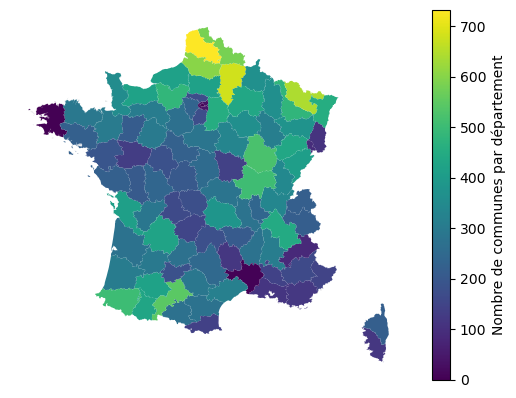

In [207]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes par département"})
ax.set_axis_off()

Nombre de communes de moins de 1000 habitants étudiées par département en 2019

In [208]:
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][(data["depart"]==x) & (data["1000_hab_19"] == False) ].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

NOM  NB_COMMUNES
0                 Ain          173
1               Aisne          589
2        Corse-du-Sud           92
3         Haute-Corse          193
4              Allier          216
..                ...          ...
91            Essonne           61
92     Hauts-de-Seine            0
93  Seine-Saint-Denis            0
94       Val-de-Marne            0
95         Val-d'Oise           75

[96 rows x 2 columns]

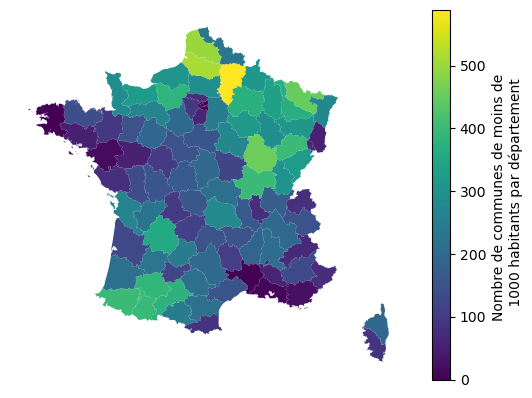

In [209]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes de moins de \n 1000 habitants par département"})
ax.set_axis_off()

Nombre de communes de plus de 1000 habitants étudiées par département en 2019

In [210]:
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][(data["depart"]==x) & (data["1000_hab_19"] == True) ].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

NOM  NB_COMMUNES
0                 Ain          163
1               Aisne           90
2        Corse-du-Sud           25
3         Haute-Corse           27
4              Allier           66
..                ...          ...
91            Essonne          111
92     Hauts-de-Seine           26
93  Seine-Saint-Denis           36
94       Val-de-Marne           44
95         Val-d'Oise           95

[96 rows x 2 columns]

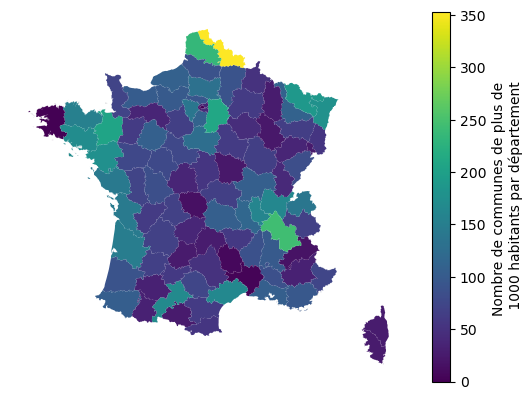

In [211]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes de plus de \n 1000 habitants par département"})
ax.set_axis_off()